In [1]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as pgo
import plotly.io as pio

import wmfdata as wmf

In [3]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [4]:
pio.renderers["plotly_mimetype"]

PlotlyRenderer(config={})

    Renderer to display figures using the plotly mime type.  This renderer is
    compatible with JupyterLab (using the @jupyterlab/plotly-extension),
    VSCode, and nteract.

    mime type: 'application/vnd.plotly.v1+json'
    

In [4]:
page_views = pd.read_parquet("sample-data/page_views.parquet")
page_views

time agent_type   page_views
0   2015-04-01     spider   3179006344
1   2015-04-01       user  18427001405
2   2015-05-01     spider   3536803123
3   2015-05-01       user  18526977173
4   2015-06-01     spider   2397335993
..         ...        ...          ...
232 2023-05-01     spider   5656423165
233 2023-05-01       user  16354594846
234 2023-06-01  automated   2667178611
235 2023-06-01     spider   5777339166
236 2023-06-01       user  15498867757

[237 rows x 3 columns]

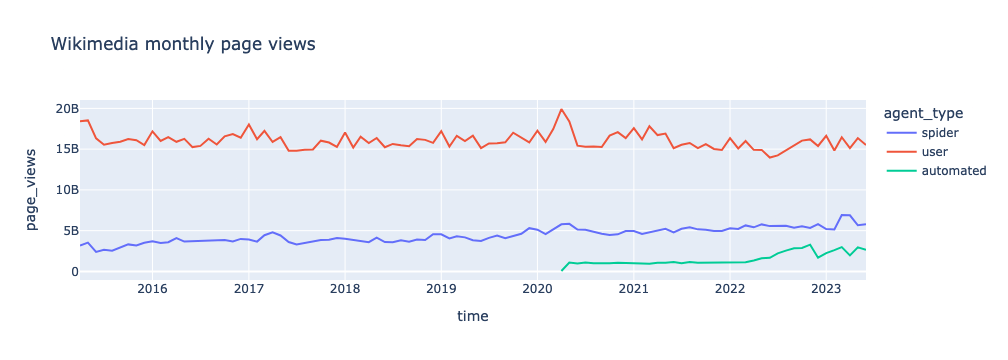

In [25]:
fig = px.line(
    page_views,
    x="time",
    y="page_views",
    color="agent_type",
    title="Wikimedia monthly page views"
)

# Renders with height of 360px and width to fill the container
fig.show()

In [11]:
fig.show?

Signature: fig.show(*args, **kwargs)
Docstring:
Show a figure using either the default renderer(s) or the renderer(s)
specified by the renderer argument

Parameters
----------
renderer: str or None (default None)
    A string containing the names of one or more registered renderers
    (separated by '+' characters) or None.  If None, then the default
    renderers specified in plotly.io.renderers.default are used.

validate: bool (default True)
    True if the figure should be validated before being shown,
    False otherwise.

width: int or float
    An integer or float that determines the number of pixels wide the
    plot is. The default is set in plotly.js.

height: int or float
    An integer or float that determines the number of pixels wide the
    plot is. The default is set in plotly.js.

config: dict
    A dict of parameters to configure the figure. The defaults are set
    in plotly.js.

Returns
-------
None
File:      ~/.conda/envs/2024-11-25T17.58.14_nshahquinn-wmf/lib/pyt

Config options can be passed to the `config` argument of `fig.show`.
- Basic documentation: https://plotly.com/python/configuration-options/
- Full list of available options in the source code: https://github.com/plotly/plotly.js/blob/master/src/plot_api/plot_config.js

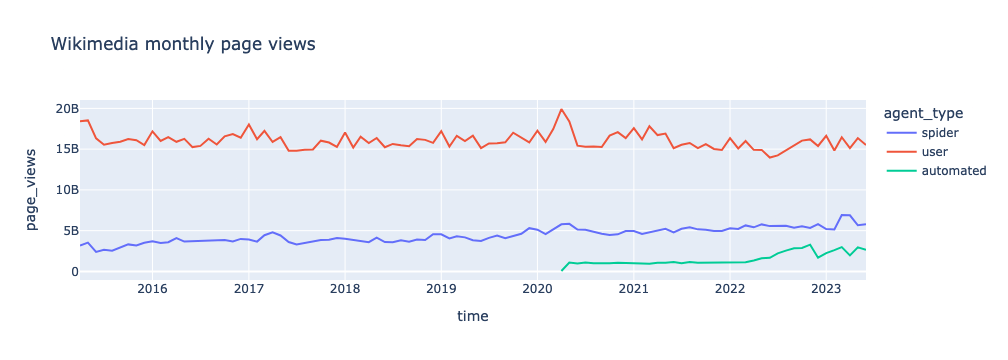

In [14]:
# Same rendering as before
fig.show(config={"autosizable": True})

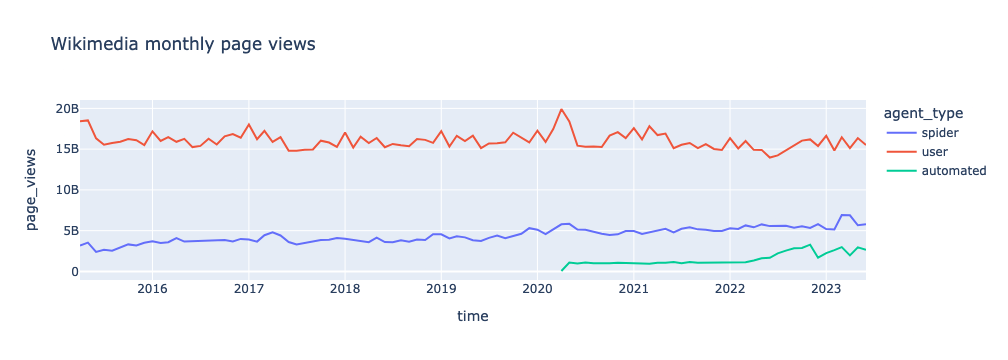

In [17]:
# Renders at window.innerWidth and window.innerHeight, which doesn't work properly in JupyterLab because it doesn't account for sidebars and such.
fig.show(config={"fillFrame": True})

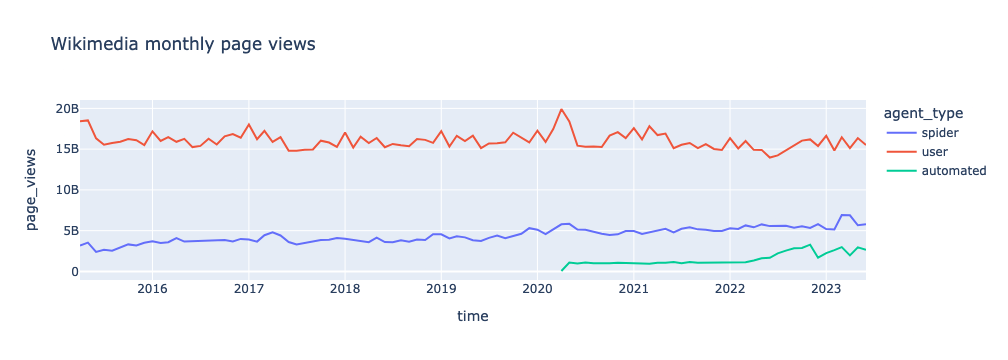

In [30]:
fig.show(config={"responsive": False}, width=1000, height=600)

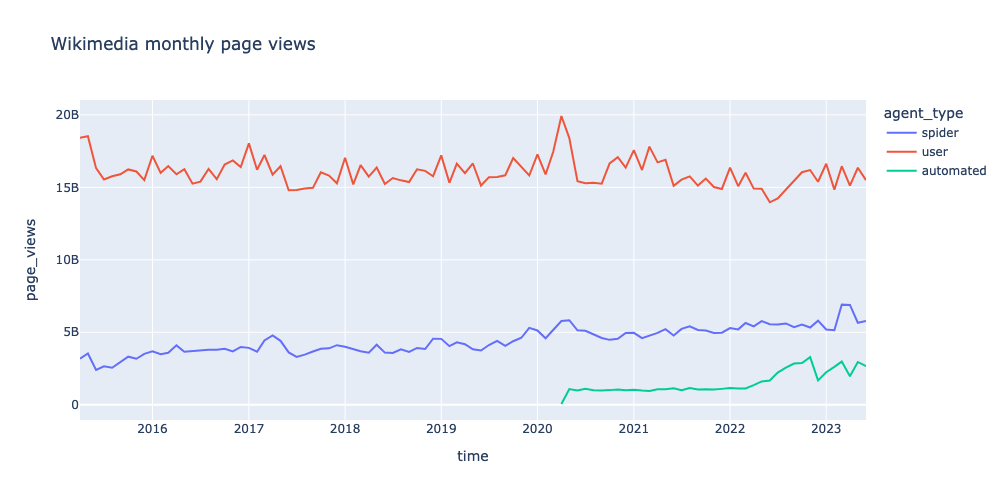

In [18]:
fig = px.line(
    page_views,
    x="time",
    y="page_views",
    color="agent_type",
    title="Wikimedia monthly page views",
    height=500
)

fig.show()

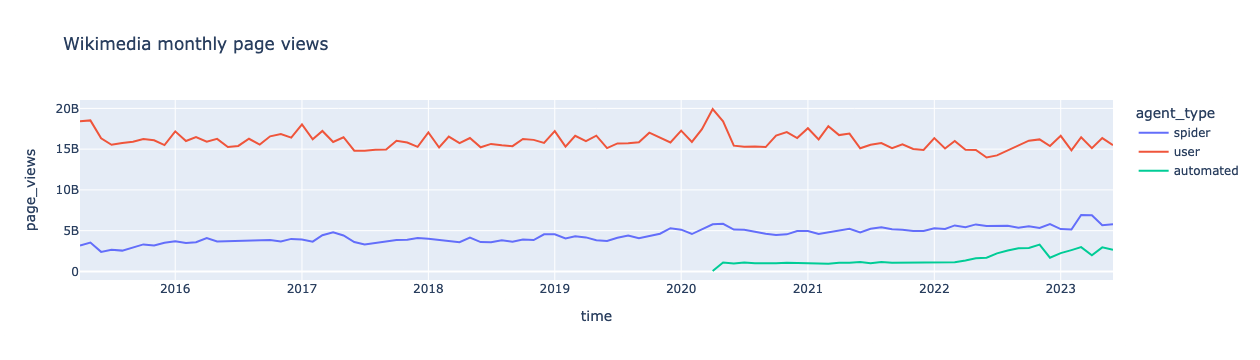

In [23]:
# width and height arguments have no effect
fig.show(width=500, height=500)

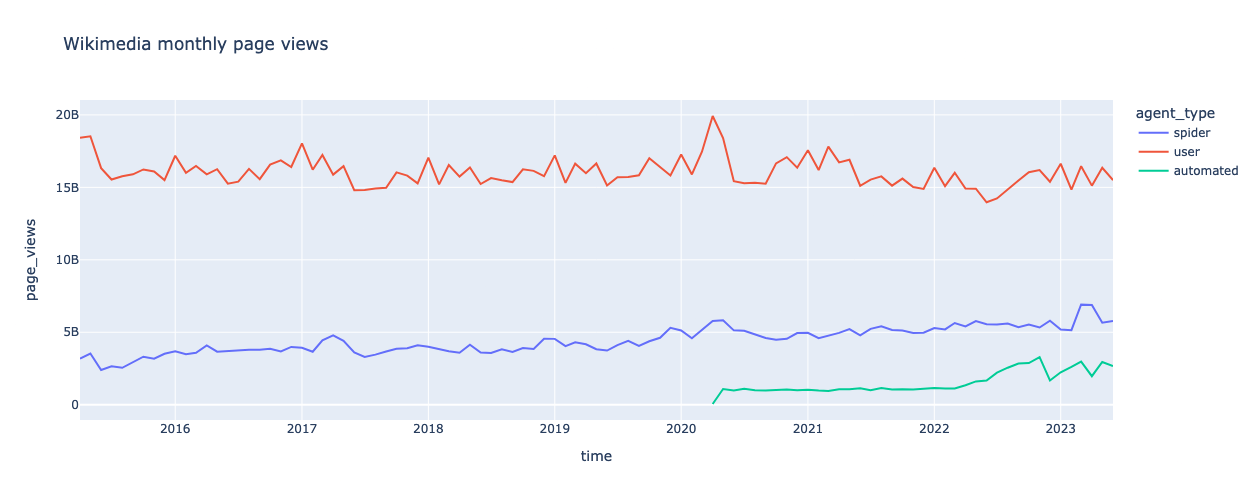

In [9]:
fig = px.line(
    page_views,
    x="time",
    y="page_views",
    color="agent_type",
    title="Wikimedia monthly page views",
    width=500,
    height=500
)

# Renders with width 500 and height 500, as expected
fig.show()

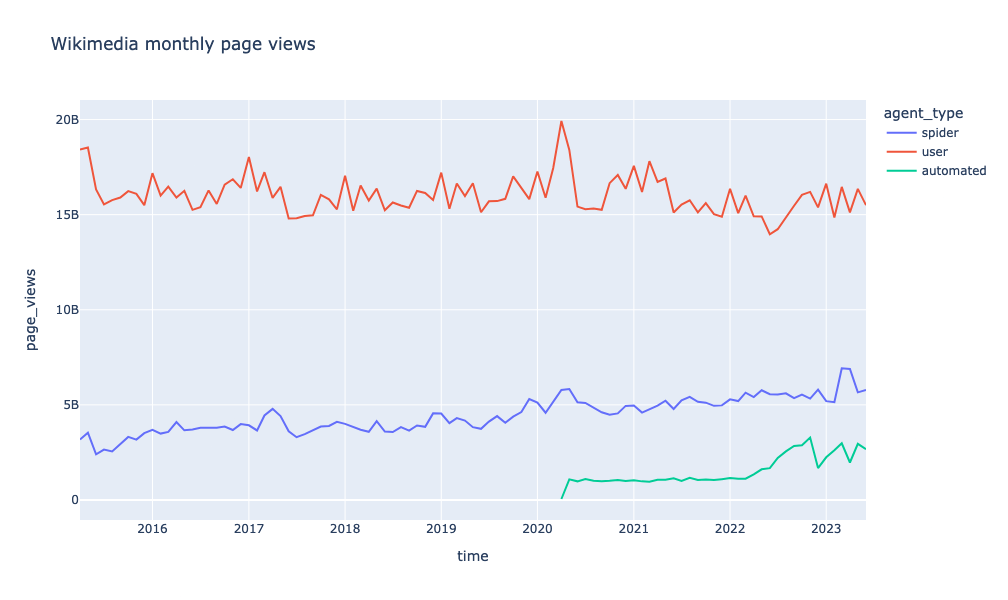

In [14]:
fig = px.line(
    page_views,
    x="time",
    y="page_views",
    color="agent_type",
    title="Wikimedia monthly page views",
    width=1000,
    height=600,
)

# 1000 x 600 px seems like a good general purpose 

fig.show()

In [2]:
pio.templates.default

'plotly'

In [31]:
# This should work, but for some reason it doesn't
# https://community.plotly.com/t/default-figure-size/82030

pio.templates["nsq"] = pgo.layout.Template(
    layout={
        "width": 1000,
        "height": 600,
        "autosize": False
    }
)

pio.templates.default = "plotly+nsq"
# pio.templates.default = "nsq+plotly"

In [32]:
pio.templates.default

'plotly+nsq'

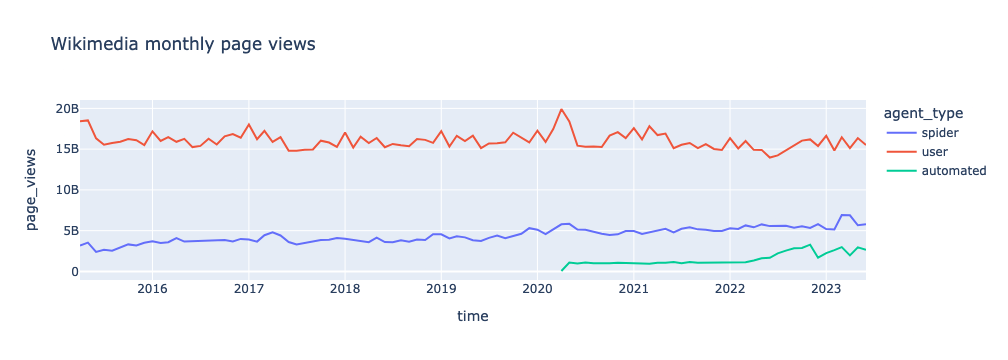

In [33]:
fig = px.line(
    page_views,
    x="time",
    y="page_views",
    color="agent_type",
    title="Wikimedia monthly page views",
)

fig.show()

## Notes
* `plotly_mimetype` renderer defaults to a height of 360 px and a width to fill the container.
  * Changing the default width (which requires `autosize=True`) works, but the height setting has no effect.
* Static image renderers default to 700 x 500 px.